In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.metrics import accuracy_score
import time


In [26]:
data=pd.read_csv('/home/jabed/Downloads/Desktop_backup/Desk1/Logistic Regression/Titanic/train_and_test2.csv')
data.dropna(inplace=True)
#X=np.column_stack((data['Age'],data['Sex'],data['Pclass']))
X=data.drop(columns=['2urvived']).values
y=data['2urvived'].values
y=y.reshape((y.shape[0],1))


In [27]:
X_scaled=scaler.fit_transform(X)
X_scaled.shape

(1307, 27)

In [28]:
class Linear:
    def __init__(self,input_dim,units):
        super(Linear,self)
        self.weights=np.random.randn(input_dim,units)
        self.bias=np.zeros(units)
    def __call__(self,x):
        self.x=x
        return self.x@self.weights+self.bias
    def backward(self, gradient):
        try:
            self.weights_gradient = self.x.T @ gradient
            self.bias_gradient = gradient.sum(axis=0)
            self.x_gradient = gradient @ self.weights.T

        except:
            self.x=self.x.reshape((self.x.shape[0],1))
            self.weights_gradient = self.x@ gradient
            self.bias_gradient = gradient.sum(axis=0)
            self.x_gradient = gradient @ self.weights.T

        return self.x_gradient

    def update(self, lr,momentum=False,gamma=0.9,prev_v_w=0,prev_v_b=0):
        
        
        
        
        if momentum==False:
            self.weights = self.weights - lr * self.weights_gradient
            self.bias = self.bias - lr * self.bias_gradient    
        if momentum==True:
            
            v_w=gamma*prev_v_w+lr*self.weights_gradient  
            v_b=gamma*prev_v_b+lr*self.bias_gradient

            self.weights = self.weights - v_w
            self.bias = self.bias - v_b
            return v_w,v_b    
            
            
            


In [29]:
class BCE:
    def __call__(self,y_pred,y_true):
        try:

            self.y_pred=y_pred
            self.y_true=y_true
            m = y_true.shape[1]
            y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        except:
            self.y_pred=y_pred
            self.y_true=y_true
            m=1



    # Calculating loss
        loss = -1/m * (np.dot(y_true.T, np.log(y_pred)) + np.dot((1 - y_true).T, np.log(1 - y_pred)))

        return loss
        #y_true= n by 1
        #y_pred=n by 1
        #np.dot(y_true.T,np.log(y_pred)) =1 by n dot n by 1= 1 by 1
    
    def backprop(self):
        return ((self.y_pred-self.y_true)/self.y_pred*(1-self.y_pred))

  # outut= del L / del Z
  #       

In [30]:
class SigmoidActivation:
      
    def __call__(self,Z):
        
        self.z=(1./(1+np.exp(-Z)))
        return self.z
    def sigmoid_backprop(self,output_gradient):

        return (output_gradient*self.z*(1-self.z))


def BinaryCrossEntropy(y_true, y_pred):

    m = y_true.shape[1]

    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

    # Calculating loss

    loss = -1/m * (np.dot(y_true.T, np.log(y_pred)) + np.dot((1 - y_true).
    T, np.log(1 - y_pred)))

    return loss
    

print(BinaryCrossEntropy(np.array([1, 1, 1]).reshape(-1, 1), np.array([1, 1, 0]).reshape(-1, 1)))

def BinaryCrossEntropy(y_true, y_pred):
    m = y_true.shape[1]
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Calculating loss
    loss = -1/m * (np.dot(y_true.T, np.log(y_pred)) + np.dot((1 - y_true).T, np.log(1 - y_pred)))

    return loss
def linear(x):
    w=np.array([[1]])

    b=np.zeros(1)
    return x@w+b
z=linear(inputs)

def sigmoid(x):
    return 1./(1+np.exp(-x))
pred=sigmoid(z)
loss=BCE()
loss_value=loss(pred,out)


In [31]:
class Model:
    def __init__(self,input_dim,units):
        super(Model,self)
        self.linear=Linear(input_dim,units)
        self.sigmoid=SigmoidActivation()
        self.loss=BCE()
        
        
    def forward(self,xb):
        self.xb=xb
        #self.activation=self.sigmoid(self.xb)
        l1=self.linear(self.xb)
        s1=self.sigmoid(l1)

        return s1

    def model_backward(self,out_gradient):
        
     
        

        sigmoid_gradient=self.sigmoid.sigmoid_backprop(out_gradient)
        linear_gradient=self.linear.backward(sigmoid_gradient)
        return linear_gradient
    def accuracy(self,y_true,pred,threshold=0.5):
        pred[pred > threshold] = 1
        pred[pred <= threshold] = 0  
        accuracy=accuracy_score(y_true,pred) 
        return accuracy 
        
    def update(self,momentum=False,lr=0.001,gamma=0.9,prev_v_w=0,prev_v_b=0):
        if momentum==True:
            v_w,v_b=self.linear.update(lr,momentum=True,gamma=gamma,prev_v_w=prev_v_w,prev_v_b=prev_v_b)
            return v_w,v_b


        else:


            self.linear.update(lr)

        
        







            


Gradient Descent algorithm 




after 0 epoch loss is 2326.8195 and accuracy 0.4239
after 1 epoch loss is 2184.4745 and accuracy 0.4353
after 2 epoch loss is 2058.5368 and accuracy 0.4468
after 3 epoch loss is 1948.8281 and accuracy 0.4682
after 4 epoch loss is 1854.4794 and accuracy 0.4858
after 5 epoch loss is 1773.6084 and accuracy 0.4935
after 6 epoch loss is 1703.6010 and accuracy 0.5088
after 7 epoch loss is 1642.1202 and accuracy 0.5210
after 8 epoch loss is 1587.5269 and accuracy 0.5333
after 9 epoch loss is 1538.6485 and accuracy 0.5493
after 10 epoch loss is 1494.5875 and accuracy 0.5631
after 11 epoch loss is 1454.6410 and accuracy 0.5792
after 12 epoch loss is 1418.2538 and accuracy 0.5899
after 13 epoch loss is 1384.9766 and accuracy 0.6021
after 14 epoch loss is 1354.4315 and accuracy 0.6144
after 15 epoch loss is 1326.2887 and accuracy 0.6182
after 16 epoch loss is 1300.2547 and accuracy 0.6259
after 17 epoch loss is 1276.0667 and accuracy 0.6289
after 18 epoch loss is 1253.4899 and accuracy 0.6343
aft

/tmp/ipykernel_7119/3099195980.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.array(j_history)[:,0])


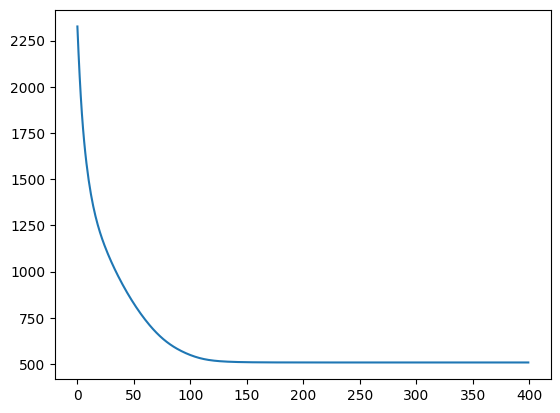

/tmp/ipykernel_7119/3099195980.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.array(j_history)[:,1])


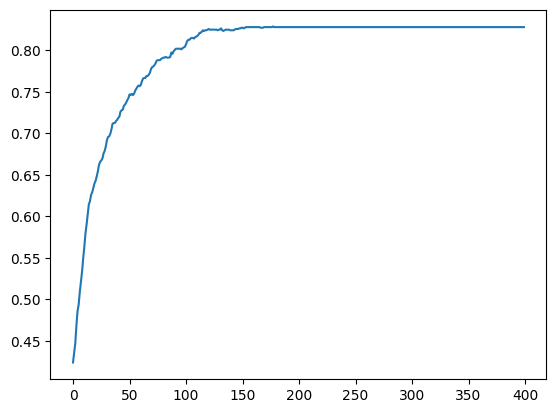

In [32]:
model=Model(X_scaled.shape[1],1)
loss=BCE()
def fit(y_true,num_epoch=400,lr=0.0001):
    start=time.time()
    j_hist=[]
    for epoch in range(num_epoch):
        
        y_pred=model.forward(X_scaled)
        loss_value = loss(y_pred, y_true)

        loss_gradient = loss.backprop()
        
        model.model_backward(loss_gradient)

        model.update(lr)
        acc=model.accuracy(y_true,y_pred)
        j_hist.append((loss_value,acc))
        print("after {} epoch loss is {:.4f} and accuracy {:.4f}".format(epoch,loss_value.item(),acc))

    end=time.time()
    print('Total time is =',end-start)    
    return j_hist    
j_history=fit(y)    

plt.plot(np.array(j_history)[:,0])
plt.show()
plt.plot(np.array(j_history)[:,1])
       

NOw applied a SGD 

after 0 epoch loss is 12536.5321 and accuracy 0.3665
after 1 epoch loss is 12536.0524 and accuracy 0.3665
after 2 epoch loss is 12535.8805 and accuracy 0.3665
after 3 epoch loss is 12536.5381 and accuracy 0.3665
after 4 epoch loss is 12536.5372 and accuracy 0.3665
after 5 epoch loss is 12536.3328 and accuracy 0.3657
after 6 epoch loss is 12536.2522 and accuracy 0.3665
after 7 epoch loss is 12536.0884 and accuracy 0.3657
after 8 epoch loss is 12535.8903 and accuracy 0.3657
after 9 epoch loss is 12535.0320 and accuracy 0.3665
after 10 epoch loss is 12534.7705 and accuracy 0.3665
after 11 epoch loss is 12534.7691 and accuracy 0.3665
after 12 epoch loss is 12532.3846 and accuracy 0.3665
after 13 epoch loss is 12532.2124 and accuracy 0.3665
after 14 epoch loss is 12533.9781 and accuracy 0.3665
after 15 epoch loss is 12533.3884 and accuracy 0.3665
after 16 epoch loss is 12533.4879 and accuracy 0.3665
after 17 epoch loss is 12532.3026 and accuracy 0.3665
after 18 epoch loss is 12532.6622 and 

/tmp/ipykernel_7119/1905235947.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.array(j_history)[:,0])


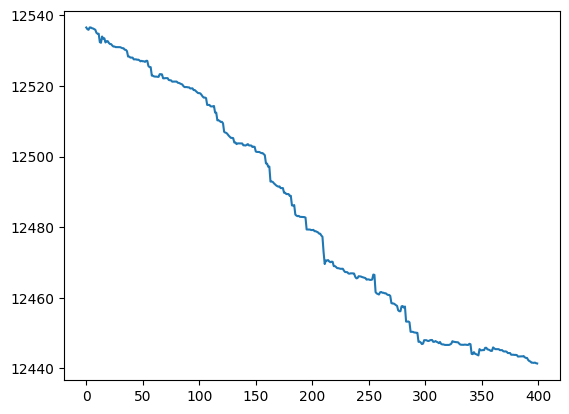

/tmp/ipykernel_7119/1905235947.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(np.array(j_history)[:,1])


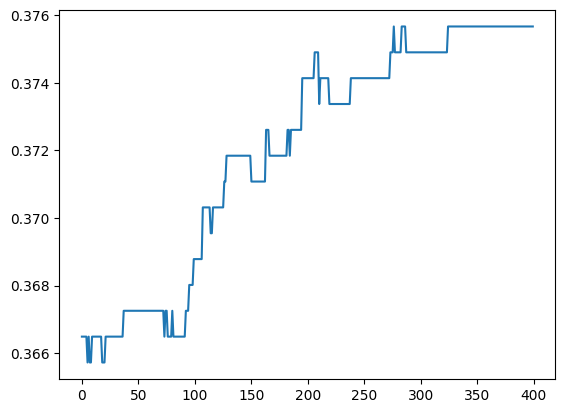

In [33]:
model=Model(X_scaled.shape[1],1)
loss=BCE()

def fit(y_true,num_epoch=400,lr=0.05):
    start=time.time()
    j_hist=[]
    for epoch in range(num_epoch):
        random=np.random.randint(X_scaled.shape[0])

        
        y_pred=model.forward(X_scaled[random].reshape((1,X_scaled.shape[1])))
        loss_value = loss(y_pred, y[random])

        loss_gradient = loss.backprop()
        
        model.model_backward(loss_gradient)

        model.update(lr)
        total_loss=loss(y_true,model.forward(X_scaled))
        acc=model.accuracy(y_true,model.forward(X_scaled))
        j_hist.append((total_loss,acc))
        print("after {} epoch loss is {:.4f} and accuracy {:.4f}".format(epoch,total_loss.item(),acc))

    end=time.time()
    print('Total time is =',end-start)    
    return j_hist 

j_history=fit(y)

plt.plot(np.array(j_history)[:,0])
plt.show()
plt.plot(np.array(j_history)[:,1])
  

Now Train Test spliting


after 0 epoch loss is 1146.9947 and accuracy 0.6251
after 1 epoch loss is 1102.2273 and accuracy 0.6496
after 2 epoch loss is 1062.5691 and accuracy 0.6863
after 3 epoch loss is 1027.5507 and accuracy 0.6985
after 4 epoch loss is 996.6465 and accuracy 0.7031
after 5 epoch loss is 969.3183 and accuracy 0.7093
after 6 epoch loss is 945.0537 and accuracy 0.7146
after 7 epoch loss is 923.3917 and accuracy 0.7246
after 8 epoch loss is 903.9330 and accuracy 0.7314
after 9 epoch loss is 886.3410 and accuracy 0.7376
after 10 epoch loss is 870.3365 and accuracy 0.7406
after 11 epoch loss is 855.6901 and accuracy 0.7475
after 12 epoch loss is 842.2146 and accuracy 0.7513
after 13 epoch loss is 829.7568 and accuracy 0.7559
after 14 epoch loss is 818.1920 and accuracy 0.7621
after 15 epoch loss is 807.4178 and accuracy 0.7651
after 16 epoch loss is 797.3501 and accuracy 0.7651
after 17 epoch loss is 787.9192 and accuracy 0.7682
after 18 epoch loss is 779.0673 and accuracy 0.7705
after 19 epoch los

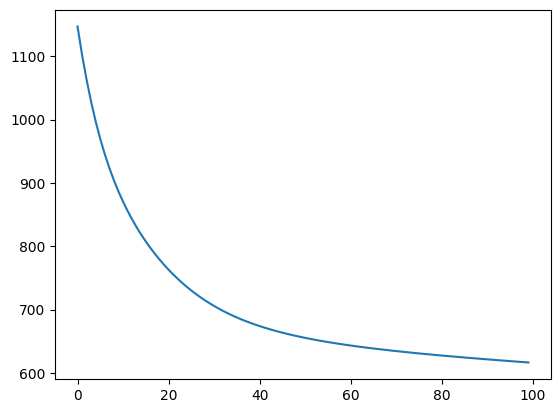

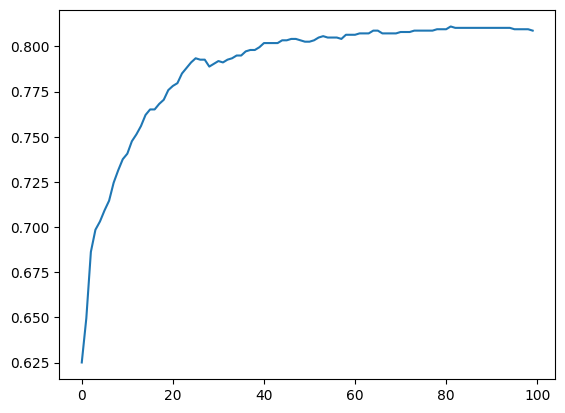

In [34]:

model=Model(X_scaled.shape[1],1)
loss=BCE()

def fit(y_true,num_epoch=100,lr=0.05):
    start=time.time()
    j_hist=[]
    for epoch in range(num_epoch):
        total_loss=0
        total_acc=0
        for i,j in enumerate(X_scaled):
        #random=np.random.randint(X_scaled.shape[0])

        
            y_pred=model.forward(j.reshape((1,j.shape[0])))
            loss_value = loss(y_pred, y[i])

            loss_gradient = loss.backprop()
            
            model.model_backward(loss_gradient)

            model.update(lr)
            total_loss+=loss_value.item()

            acc=model.accuracy(y_true[i],y_pred)
            total_acc+=acc
        total_acc/=X_scaled.shape[0]    

        j_hist.append((total_loss,total_acc))
        print("after {} epoch loss is {:.4f} and accuracy {:.4f}".format(epoch,total_loss,total_acc))

    end=time.time()
    print('Total time is =',end-start)    
    return j_hist 

j_history=fit(y)

plt.plot(np.array(j_history)[:,0])
plt.show()
plt.plot(np.array(j_history)[:,1])

In [35]:
#mini batch

In [36]:
def create_mini_batch(X,y,batch_size):
    mini_batches=[]
    data=np.hstack((X,y))
    n_minibatch=data.shape[0]//batch_size
    i=0
    for i in range(n_minibatch+1):
        mini_batch=data[i*batch_size:(i+1)*batch_size,:]
       
        X_mini=mini_batch[:,:-1]
        Y_mini=mini_batch[:,-1].reshape((-1,1))
        
            
        mini_batches.append((X_mini,Y_mini))
        
    mini_batches=mini_batches[:-1]
    
        
    return mini_batches

In [37]:
# Mini Batch Gradient Descent
mini_batches=create_mini_batch(X_scaled,y,32)


In [38]:
model=Model(X_scaled.shape[1],1)
loss=BCE()

0.2956730769230769 2765.5471175131543
0.2900641025641026 2561.413565543414
0.28846153846153844 2376.441742356839
0.27884615384615385 2210.6560964465016
0.27323717948717946 2065.8770696529627
0.2724358974358974 1941.9388481974063
0.2676282051282051 1837.911143628312
0.26842948717948717 1751.8073116306964
0.27564102564102566 1680.6472693384237
0.28685897435897434 1620.9783658665501
0.30288461538461536 1569.5290033777694
0.32051282051282054 1523.6315234038057
0.3405448717948718 1481.3326394237029
0.38221153846153844 1441.3171020426428
0.41185897435897434 1402.77067923681
0.43830128205128205 1365.2455217300865
0.4639423076923077 1328.5500277147016
0.48717948717948717 1292.6639430092766
0.5144230769230769 1257.6718499705457
0.530448717948718 1223.7098682662836
0.5472756410256411 1190.9243176531788
0.5689102564102564 1159.4429539626938
0.5817307692307693 1129.3587073947792
0.5961538461538461 1100.7241144398884
0.6161858974358975 1073.5533446532456
0.625801282051282 1047.828488000319
0.637019

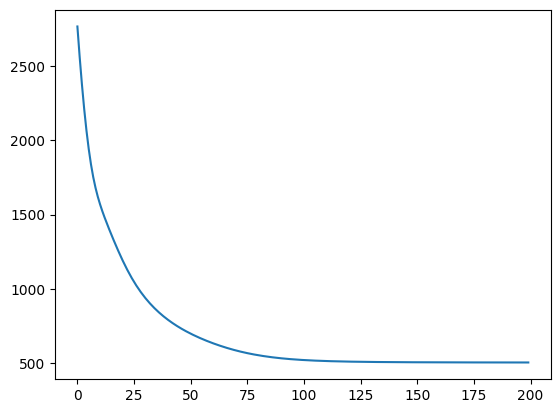

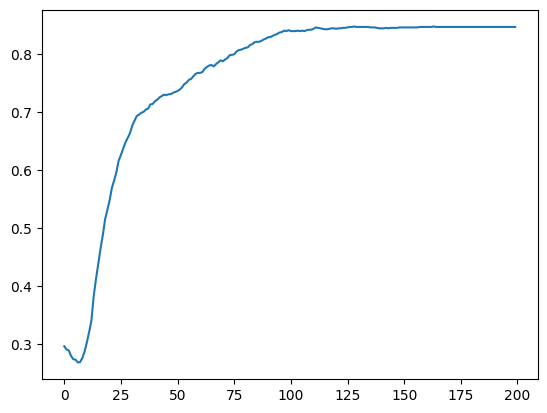

In [39]:
model=Model(X_scaled.shape[1],1)
loss=BCE()
def MinibatchGradient(num_epoch=200):
    j_hist=[]
    for epoch in range(num_epoch):
        start=time.time()
        
        lr=0.01
        total_loss=0
        total_acc=0
        for i,j in enumerate(mini_batches):
            X,y_=j
            y_pred=model.forward(X)
            loss_value = loss(y_pred, y_)

            loss_gradient = loss.backprop()
                    
            model.model_backward(loss_gradient)

            model.update(lr)
                    
            total_loss+=loss_value.item()

            acc=model.accuracy(y_,y_pred)
            total_acc+=acc
            
        total_acc/=i
        j_hist.append((total_loss,total_acc))    
        print(total_acc,total_loss)
        end=time.time()
    print('total time',end-start)
    return j_hist

j_history=MinibatchGradient() 
plt.plot(np.array(j_history)[:,0])
plt.show()
plt.plot(np.array(j_history)[:,1])   

In [40]:
"""for epoch in range(num_epochs):
    prev_v_w,prev_v_b,gamma=0.0,0.0,0.9
    eta=0.001
    for i, data in enumerate(mini_batches):
        
        X,Y=data
        dw,db=gradient(X,Y,w,b)
        if i==0:
            break
    v_w=gamma*prev_v_w+eta*dw  
    v_b=gamma*prev_v_b+eta*db

    w=w-v_w
    b=b-v_b
    prev_v_w=v_w
    prev_v_b=v_b
    loss=cost(X,Y,w,b)
    J_hist.append(loss)"""
    

'for epoch in range(num_epochs):\n    prev_v_w,prev_v_b,gamma=0.0,0.0,0.9\n    eta=0.001\n    for i, data in enumerate(mini_batches):\n        \n        X,Y=data\n        dw,db=gradient(X,Y,w,b)\n        if i==0:\n            break\n    v_w=gamma*prev_v_w+eta*dw  \n    v_b=gamma*prev_v_b+eta*db\n\n    w=w-v_w\n    b=b-v_b\n    prev_v_w=v_w\n    prev_v_b=v_b\n    loss=cost(X,Y,w,b)\n    J_hist.append(loss)'

Mini_Batch with Momentum 

0.55 1201.3053279532335
0.684375 893.0617541168283
0.72578125 793.9796394538149
0.74375 727.7655129154969
0.7921875 668.1971446802377
0.8015625 621.786159742613
0.8125 599.400790870033
0.81328125 593.1420623996213
0.80625 590.8245132449849
0.81015625 588.6478651961736
0.81015625 586.2951434656602
0.8109375 583.8505833972763
0.81015625 581.3577087626733
0.81015625 578.8306040368248
0.8109375 576.2746915887028
0.8109375 573.6938607551651
0.81015625 571.0920870914669
0.809375 568.473474502433
0.8109375 565.8419928093588
0.8125 563.2012492754101
0.8125 560.554353728728
0.8109375 557.9038711060607
0.809375 555.2518522222821
0.809375 552.5999458611724
0.80859375 549.9496090012469
0.80859375 547.3024433286624
0.81015625 544.6606933250308
0.8109375 542.0279411286818
0.8109375 539.410020600629
0.8109375 536.8161417882526
0.81328125 534.2601734464582
0.8125 531.7620315076655
0.81484375 529.3493505518356
0.8171875 527.0604474909821
0.81875 524.9511663591643
0.81953125 523.1078698109947
0.821875 5

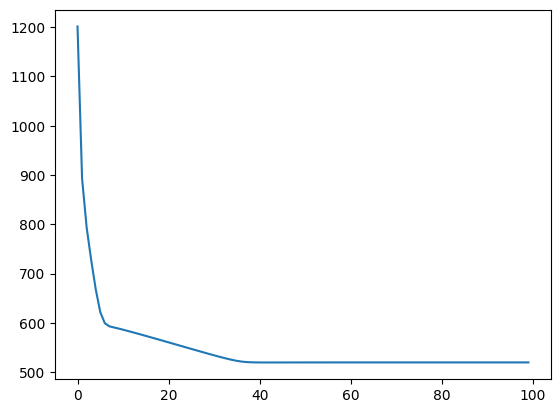

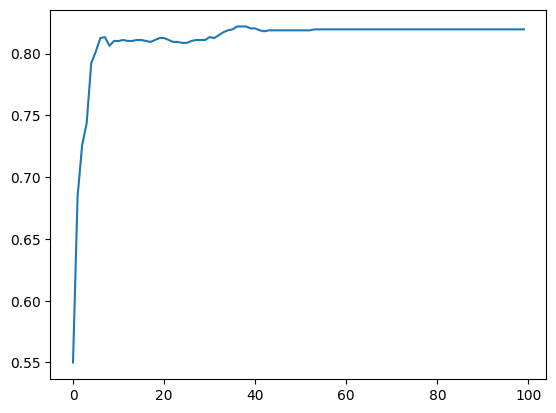

In [41]:
num_epoch=100


model=Model(X_scaled.shape[1],1)
loss=BCE()

def MinibatchGradient(num_epoch=100,gamma=0.9):
    j_hist=[]
    prev_v_w,prev_v_b=0,0
    for epoch in range(num_epoch):
        start=time.time()
        
        lr=0.001
        total_loss=0
        total_acc=0
        for i,j in enumerate(mini_batches):
            X,y_=j
            y_pred=model.forward(X)
            loss_value = loss(y_pred, y_)

            loss_gradient = loss.backprop()
                    
            model.model_backward(loss_gradient)

            v_w,v_b=model.update(momentum=True,lr=lr,gamma=gamma,prev_v_w=prev_v_w,prev_v_b=prev_v_b)
            prev_v_w=v_w
            prev_v_b=v_b
                    
            total_loss+=loss_value.item()

            acc=model.accuracy(y_,y_pred)
            total_acc+=acc
            
        total_acc/=i+1
        j_hist.append((total_loss,total_acc))    
        print(total_acc,total_loss)
        end=time.time()
    print('total time',end-start)
    return j_hist

j_history=MinibatchGradient() 
plt.plot(np.array(j_history)[:,0])
plt.show()
plt.plot(np.array(j_history)[:,1])   

Mini Batch Without Momentum

0.42109375 1276.185605222022
0.44765625 1195.3974684824068
0.5140625 1126.0078651921199
0.5546875 1066.629899663053
0.5953125 1015.8772342425193
0.63046875 972.4499108490611
0.6546875 935.1969471626384
0.68515625 903.13503740761
0.7015625 875.4408559446429
0.715625 851.4342783428796
0.72421875 830.555719562469
0.7296875 812.3420792990983
0.74296875 796.4063463329998
0.753125 782.4222401226835
0.7609375 770.1128647108742
0.76328125 759.2420774122539
0.76328125 749.607710750738
0.7671875 741.0361478216959
0.77109375 733.3779366532254
0.77578125 726.5042182039095
0.77578125 720.3037948632024
0.7765625 714.6807038100332
0.7796875 709.5521881634158
0.78203125 704.8469809872133
0.78515625 700.5038351134772
0.78671875 696.470247045797
0.7875 692.7013364787099
0.79140625 689.1588540743484
0.79375 685.810298749735
0.79375 682.6281317836084
0.79375 679.5890788243942
0.79453125 676.6735128962175
0.79453125 673.8649123432433
0.7953125 671.1493878438481
0.7953125 668.515272551504
0.79609375 665.952

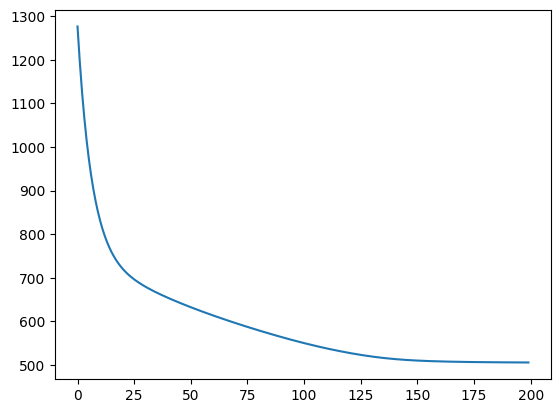

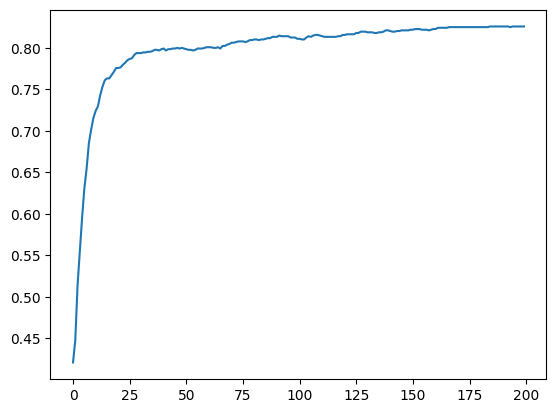

In [42]:

model=Model(X_scaled.shape[1],1)
loss=BCE()

def MinibatchGradient(num_epoch=200,gamma=0.9):
    j_hist=[]
    prev_v_w,prev_v_b=0,0
    for epoch in range(num_epoch):
        start=time.time()
        
        lr=0.001
        total_loss=0
        total_acc=0
        for i,j in enumerate(mini_batches):
            X,y_=j
            y_pred=model.forward(X)
            loss_value = loss(y_pred, y_)

            loss_gradient = loss.backprop()
                    
            model.model_backward(loss_gradient)

            model.update(momentum=False,lr=lr,gamma=gamma,prev_v_w=prev_v_w,prev_v_b=prev_v_b)
            #prev_v_w=v_w
            #prev_v_b=v_b
                    
            total_loss+=loss_value.item()

            acc=model.accuracy(y_,y_pred)
            total_acc+=acc
            
        total_acc/=i+1
        j_hist.append((total_loss,total_acc))    
        print(total_acc,total_loss)
        end=time.time()
    print('total time',end-start)
    return j_hist

j_history=MinibatchGradient() 
plt.plot(np.array(j_history)[:,0])
plt.show()
plt.plot(np.array(j_history)[:,1])   